<a href="https://colab.research.google.com/github/therealellam/CORE_WK4/blob/main/CORE_IP_WK4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Defining the Question**


>  # a) Specifying the Question



We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

# **2. Importing Libraries**

In [45]:
#We first import python libraries we will use
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **3. Loading the Dataset**

In [46]:
#Load the Data into a dataframe
#The dataset used in this project was provided in the following 
#url = "http://bit.ly/DSCoreAutolibDataset" 

df=pd.read_csv('/content/autolib_daily_events_postal_code.csv')

#Viewing the first 5 entries
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


# **4. Checking the Data**

In [47]:
# Determining the no. of records in the dataset
df.shape

(16085, 13)

In [48]:
# Checking whether each column has an appropriate datatype
df.dtypes

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object

# **5. Tidying the Dataset**

In [49]:
#Checking for Missing Values
df.isnull().values.any()

False

In [50]:
# Dealing with the Missing Data
df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

# **7. Checking for & Removing Duplicates**

In [51]:
#checking data for duplicates
df.duplicated().values.any()

False

In [52]:
#Dropping Duplicates
# df.drop_duplicates(keep=False,inplace=True)

# df.duplicated().values.any()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


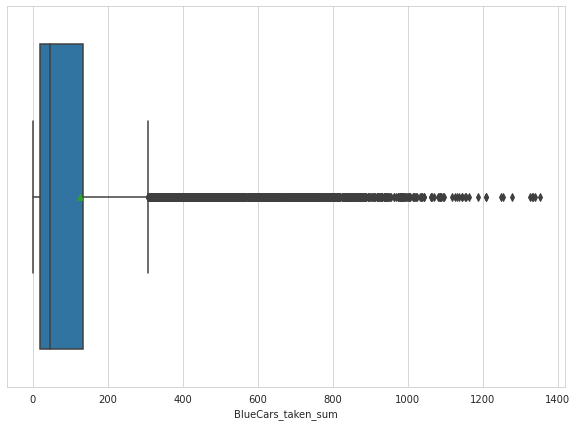

In [53]:
#plotting Blue Car values to find outliers
plt.figure(figsize=(10, 7))
sns.boxplot(df["BlueCars_taken_sum"], showmeans=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


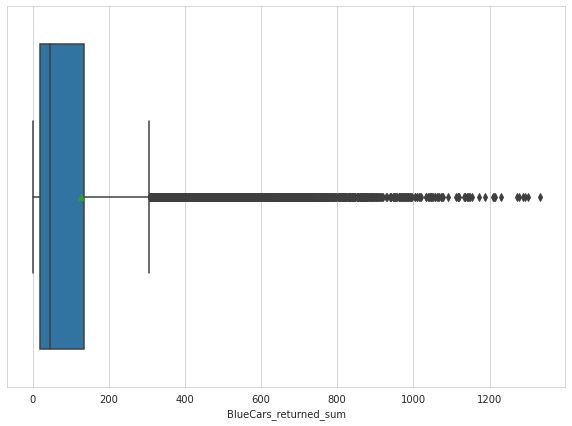

In [54]:
#plotting returned Blue Car values to find outliers
plt.figure(figsize=(10, 7))
sns.boxplot(df["BlueCars_returned_sum"], showmeans=True)

# **EXPLORATORY ANALYSIS**

# **Univariate Analysis - Categorical Variables**

In [55]:
#Defining a function for Univariate visualizations

def uni(data,column,palette):
  new_dt=df.groupby(column)[column].count()
  sns.set_style("whitegrid")
  ax, bar = plt.subplots(figsize=(12,10))
  ax = sns.barplot(x = new_dt.keys(), y = new_dt.values, data=df, palette = palette)
  ax.set_ylabel("Count", fontsize=10)
  ax.set_xlabel(f"{column.title()}", fontsize=10)
  ax.set_title(f"{column.title()}", fontsize=10)
  plt.show()

  return new_dt




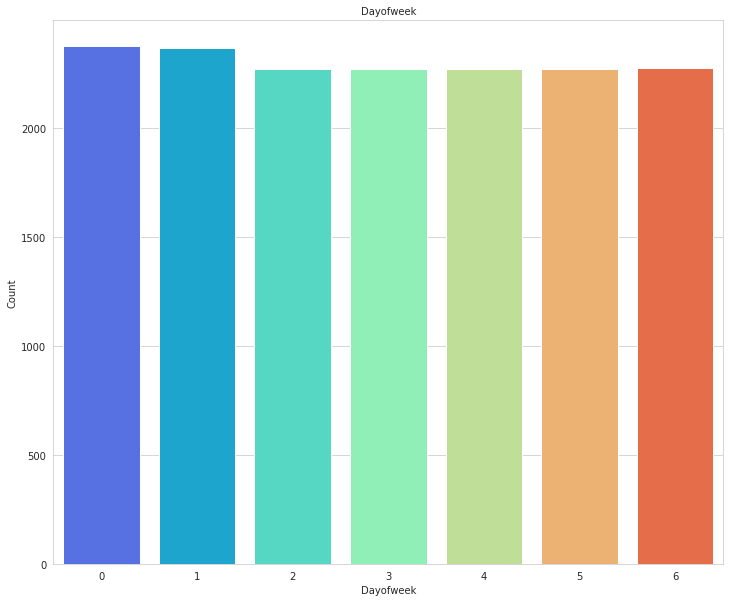

dayOfWeek
0    2374
1    2363
2    2268
3    2268
4    2271
5    2267
6    2274
Name: dayOfWeek, dtype: int64

In [56]:
uni(df,'dayOfWeek',palette = "rainbow")

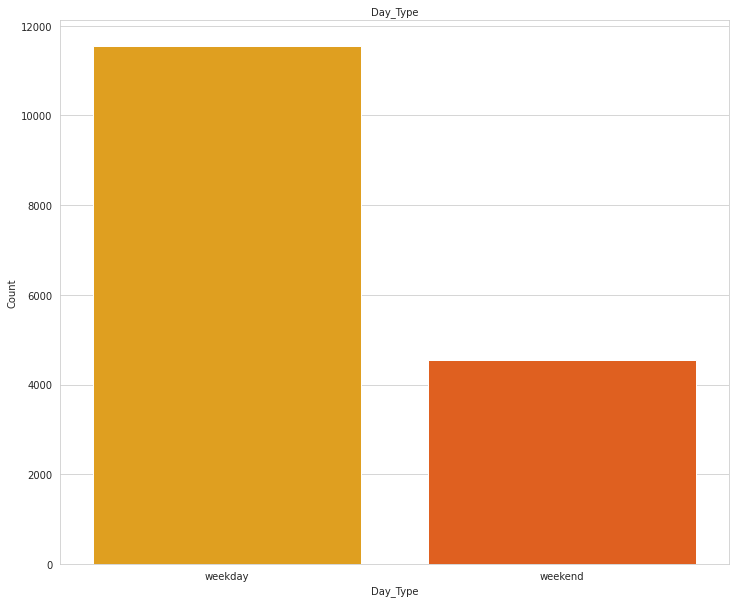

day_type
weekday    11544
weekend     4541
Name: day_type, dtype: int64

In [57]:
uni(df,'day_type',palette = "autumn_r")

Our age analysis depicted that we had outliers in the Respondent Age column

# **Numerical variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

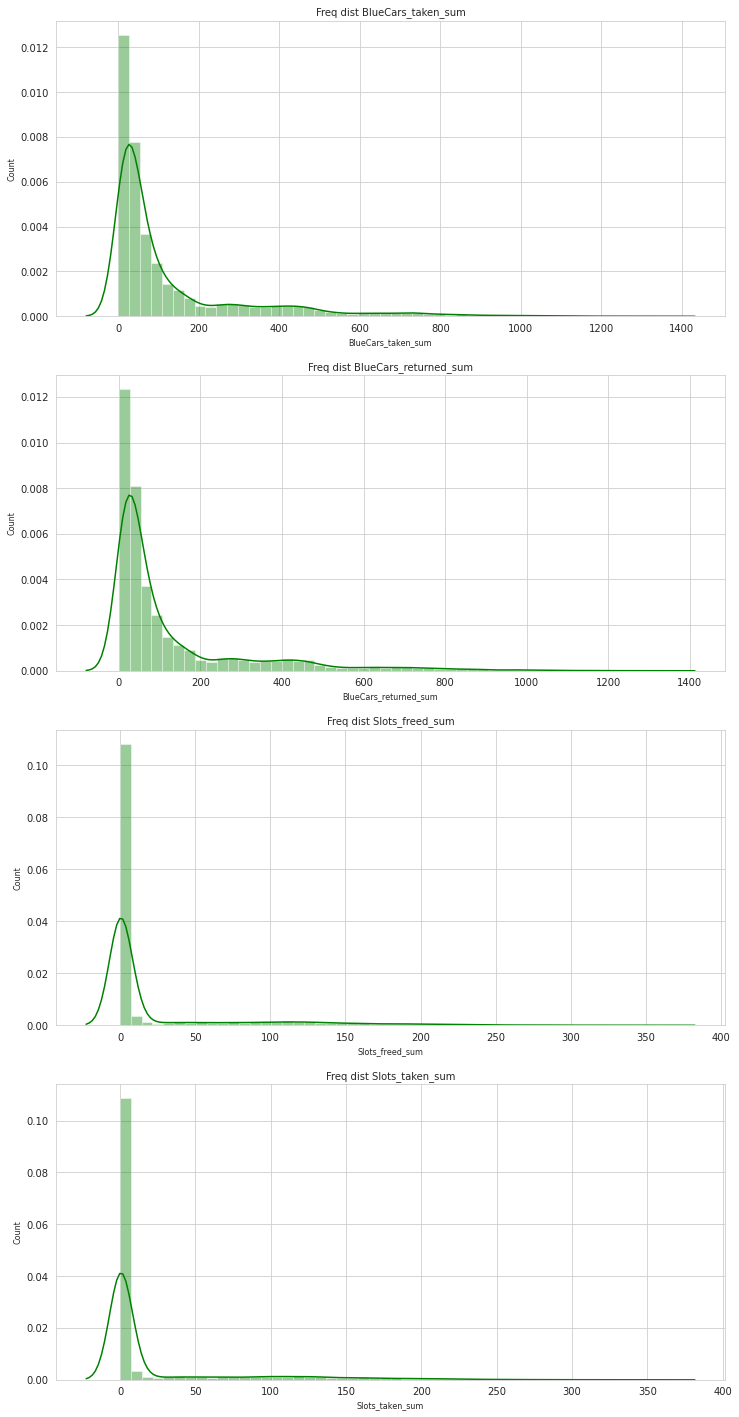

In [58]:
#Analyzing numerical columns

col_names = ['BlueCars_taken_sum','BlueCars_returned_sum','Slots_freed_sum', 'Slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(12,25))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i],color= 'GREEN')
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

# **BIVARIATE ANALYSIS**

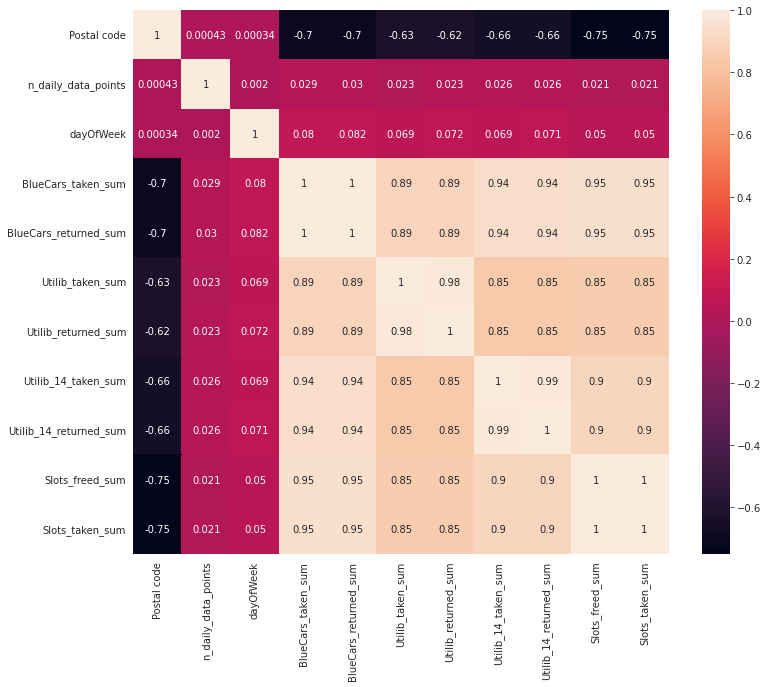

In [60]:
#Plotting a heat map to show correlation for all our variables

plt.figure(figsize=(12, 10))

heat_map =df.corr()

sns.heatmap(heat_map,xticklabels = heat_map.columns.values,yticklabels = heat_map.columns.values,annot = True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


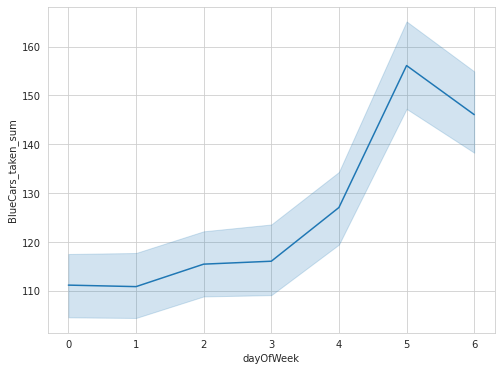

In [65]:
#frequency of Blucars taken each day of the week

plt.figure(figsize=(8, 6))
sns.lineplot(df['dayOfWeek'],df['BlueCars_taken_sum'])
plt.show()

#most Bluecars were picked on Saturday

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


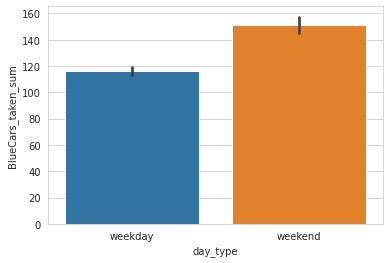

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [66]:
#frequency of Blucars taken each day of the week
sns.barplot(df['day_type'],df['BlueCars_taken_sum'])
plt.show()
plt.figure(figsize=(8, 6))
#most Bluecars were picked over the weekend

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


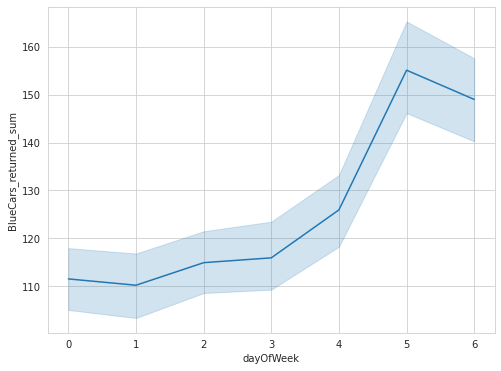

In [67]:
#frequency of Blucars returned each day of the week

plt.figure(figsize=(8, 6))
sns.lineplot(df['dayOfWeek'],df['BlueCars_returned_sum'])
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


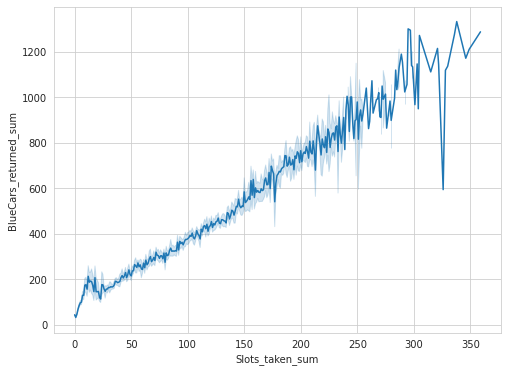

In [69]:
#frequency of Blucars returned vs slots taken

plt.figure(figsize=(8, 6))
sns.lineplot(df['Slots_taken_sum'],df['BlueCars_returned_sum'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


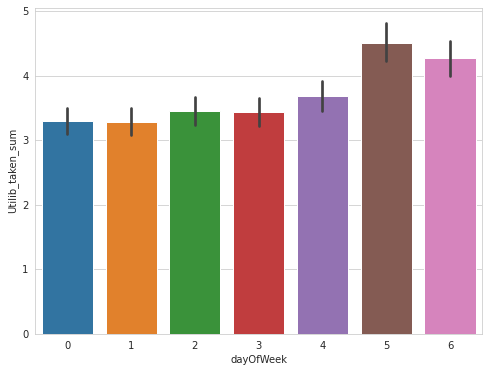

In [72]:
#frequency of Blucars taken each day of the week

plt.figure(figsize=(8, 6))
sns.barplot(df['dayOfWeek'],df['Utilib_taken_sum'])
plt.show()

#most Bluecars were picked on Saturday

# **HYPOTHESIS TESTING**

**Null Hypothesis**

The Average number of Bluecars taken in postal code 75001 over weekdays is not different from average number of Bluecars taken in postal code 75002

**Alternative Hypothesis**

The Average number of Bluecars taken in postal code 75001 over weekdays is different from average number of Bluecars taken in postal code 75002

 **The level of significance for this test is 0.025 since this is a two tailed test**

In [73]:
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


In [77]:
#Splitting the data

subset_1 = df[(df['Postal code'] == 75001) & (df['day_type'] == 'weekday')]
subset_1.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [78]:
subset_2 = df[(df['Postal code'] == 75002) & (df['day_type'] == 'weekday')]
subset_2.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
156,75002,1/1/2018,1440,0,weekday,145,138,4,6,12,11,30,29
157,75002,1/2/2018,1438,1,weekday,137,125,6,4,8,8,32,31
158,75002,1/3/2018,1439,2,weekday,166,165,3,3,16,17,31,33
159,75002,1/4/2018,1320,3,weekday,131,135,6,7,13,12,32,32
160,75002,1/5/2018,1440,4,weekday,165,165,2,2,11,11,34,32


In [87]:
# T-test for the two groups


import scipy.stats as stats
import math
from statsmodels.stats import weightstats as stests 

stats.ttest_ind(a=subset_1['BlueCars_taken_sum'],b=subset_2['BlueCars_taken_sum'])



Ttest_indResult(statistic=-14.195533638737734, pvalue=5.628557826570973e-33)

In [88]:
pvalue=5.628557826570973e-33

if pvalue <0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis
